### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#imported necessary libraries
jewel = pd.read_csv('jewel.csv')
print(jewel.isnull().sum())
#there are no missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

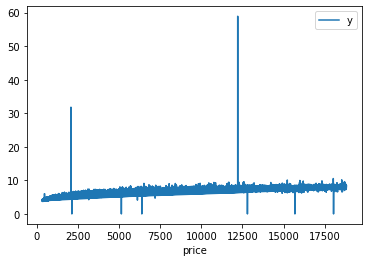

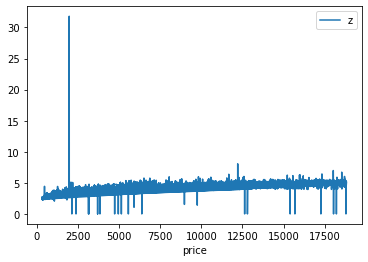

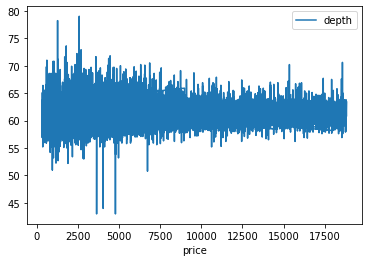

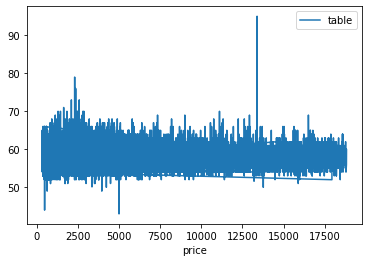

In [2]:
jewel.plot('price','y')
jewel.plot('price','z')
jewel.plot('price','depth')
jewel.plot('price','table')
plt.show()

### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

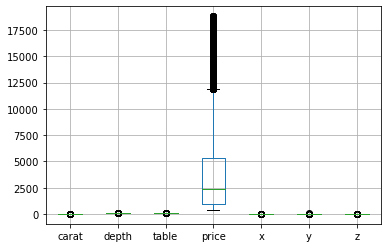

In [3]:
numeric_col = ['carat','depth','table','price','x','y','z'] #divided columns into numeric and categorical
jewel.boxplot(numeric_col) # black dots in boxplot represent outliers
for x in numeric_col: #all numeric columns has outliers
    q75, q25 = np.percentile(jewel.loc[:, x], [75, 25])
    intr_qr = q75 - q25 #calculated interquartile range
    #any value out of defined range below,is an outlier
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    jewel.loc[jewel[x] < min, x] = np.nan #if the value is out of range,changed it to NaN
    jewel.loc[jewel[x] > max, x] = np.nan
jewel = jewel.dropna(axis = 0) #drop the NaN values
jewel.isnull().sum() #check for outliers in new form

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [77]:
jewel['cut'] = jewel['cut'].replace(['Good','Very Good','Fair','Ideal','Premium'],[1,2,3,4,5])
jewel['color'] = jewel['color'].replace(['J','I','H','G','F','E','D'],[1,2,3,4,5,6,7])
jewel['clarity'] = jewel['clarity'].replace(['I1','SI1','SI2','VS1','VS2','VVS1','VVS2','IF'],[1,2,3,4,5,6,7,8])
print(jewel.head(5))

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    4      6        3   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21    5      6        2   59.8   61.0  326.0  3.89  3.84  2.31
3   0.29    5      2        5   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31    1      1        3   63.3   58.0  335.0  4.34  4.35  2.75
5   0.24    2      1        7   62.8   57.0  336.0  3.94  3.96  2.48


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


array([[<AxesSubplot:title={'center':'clarity'}>]], dtype=object)

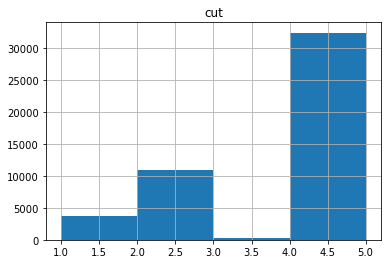

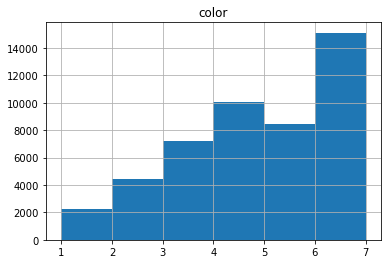

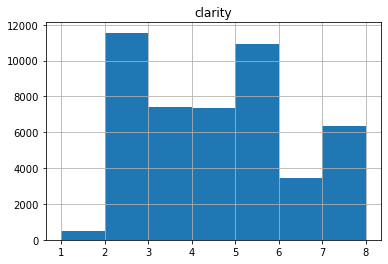

In [5]:
jewel.hist(bins = [1,2,3,4,5],column = 'cut')
jewel.hist(bins = [1,2,3,4,5,6,7],column = 'color')
jewel.hist(bins = [1,2,3,4,5,6,7,8],column ='clarity')

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [6]:
training_data = jewel.sample(frac = 0.7)
testing_data = jewel.drop(training_data.index)

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

200389.18984014375
416763.33791555616
{'n_neighbors': 6}


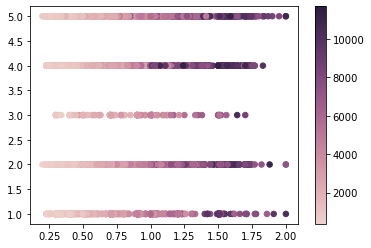

In [7]:
X = jewel.drop('price',axis = 1)
y = jewel['price']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3,random_state=1)
#this time,splitted with the library (splitted manually in Q6)
knn_model = KNeighborsRegressor(n_neighbors=3) #instance kNN
knn_model.fit(X_train, y_train) #fitted the data
train_preds = knn_model.predict(X_train) #prediction for train data
mse_train = mean_squared_error(y_train, train_preds) #mse of train data 
print(mse_train)
test_preds = knn_model.predict(X_test) #prediction for test data
mse_test = mean_squared_error(y_test, test_preds) #mse of test data
print(mse_test)
parameters = {"n_neighbors": range(1, 30)} #function for best k value
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train) #fitted the data
print(gridsearch.best_params_) #best k value (which is 6)
train_preds_grid = gridsearch.predict(X_train) #predictions for best k value
mse_train_grid = mean_squared_error(y_train, train_preds_grid) #mse of train
test_preds_grid = gridsearch.predict(X_test)
mse_test_grid = mean_squared_error(y_test, test_preds_grid) #mse of test
cmap = sns.cubehelix_palette(as_cmap=True) #plotted the data for the first 2 cols
f, ax = plt.subplots()
points = ax.scatter(
    X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_preds, s=30, cmap=cmap
)
f.colorbar(points)
plt.show()
#i didnt need to plot the elbow curve with K-Means Elbow Method for the best k,gridsearch is finding it automatically.
#Instead i plotted the data for first 2 columns

# Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [9]:
print('pending...')
scores = cross_val_score(gridsearch,X,y,cv=10)
print(scores)
final_accuracy = scores.mean()
print(final_accuracy)

pending...
[ 0.27225754  0.60536084  0.6551456   0.63467204  0.68361348 -1.73665118
 -0.67020117 -0.95306222 -0.15925651 -0.3276395 ]
-0.09957610648085291


### Question 9)

Predict the price of new jewel data with the following custom features. 

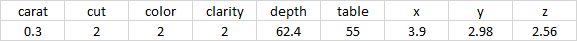

In [75]:
row = {'carat' : 0.3, 'cut' : 2, 'color' : 2, 'clarity' : 2, 'depth' : 62.4, 'table' : 55, 'x' : 3.9, 'y' : 2.98, 'z' : 2.56}
X_train1 = X_train.append(row,ignore_index=True)
blank = pd.Series([0],index=['Price'])
y_train1 = y_train.append(blank,ignore_index=True)
new_model = KNeighborsRegressor(n_neighbors=6)
new_model.fit(X_train1,y_train1)
pred = new_model.predict([X_train1.loc[len(X_train1.index)-1]])
print("The price for the given feature is {}.".format(pred))

The price for the given feature is [370.83333333].
